In [1]:
from data.Chexpert import Chexpert
from modules.ChexpertModule import ChexpertDataModule
#from modules.ChexpertModule import ChexpertDataModule
from utils.environment_settings import env_settings
from utils.utils import *
from utils._prepare_data import DataHandler
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torchvision
import numpy as np

/home/guests/usr_mlmi/.conda/envs/mlmi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params = read_config(env_settings.CONFIG)

In [3]:
processor = DataHandler(opt=params["dataset"])

In [4]:
chexpert_data_module = ChexpertDataModule(opt=params['dataset'], processor=processor)

In [5]:
chexpert_data_module.setup()

In [6]:
train_dataloader = chexpert_data_module.train_dataloader()

In [7]:
val_dataloader = chexpert_data_module.val_dataloader()

In [8]:
test_dataloader = chexpert_data_module.test_dataloader()

In [9]:
## TEST ###
dataiter = iter(train_dataloader)
first_batch = next(dataiter)
# Extract images and labels
images, labels = first_batch['target'], first_batch['report']

In [10]:
labels

tensor([[1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]],
       dtype=torch.float64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


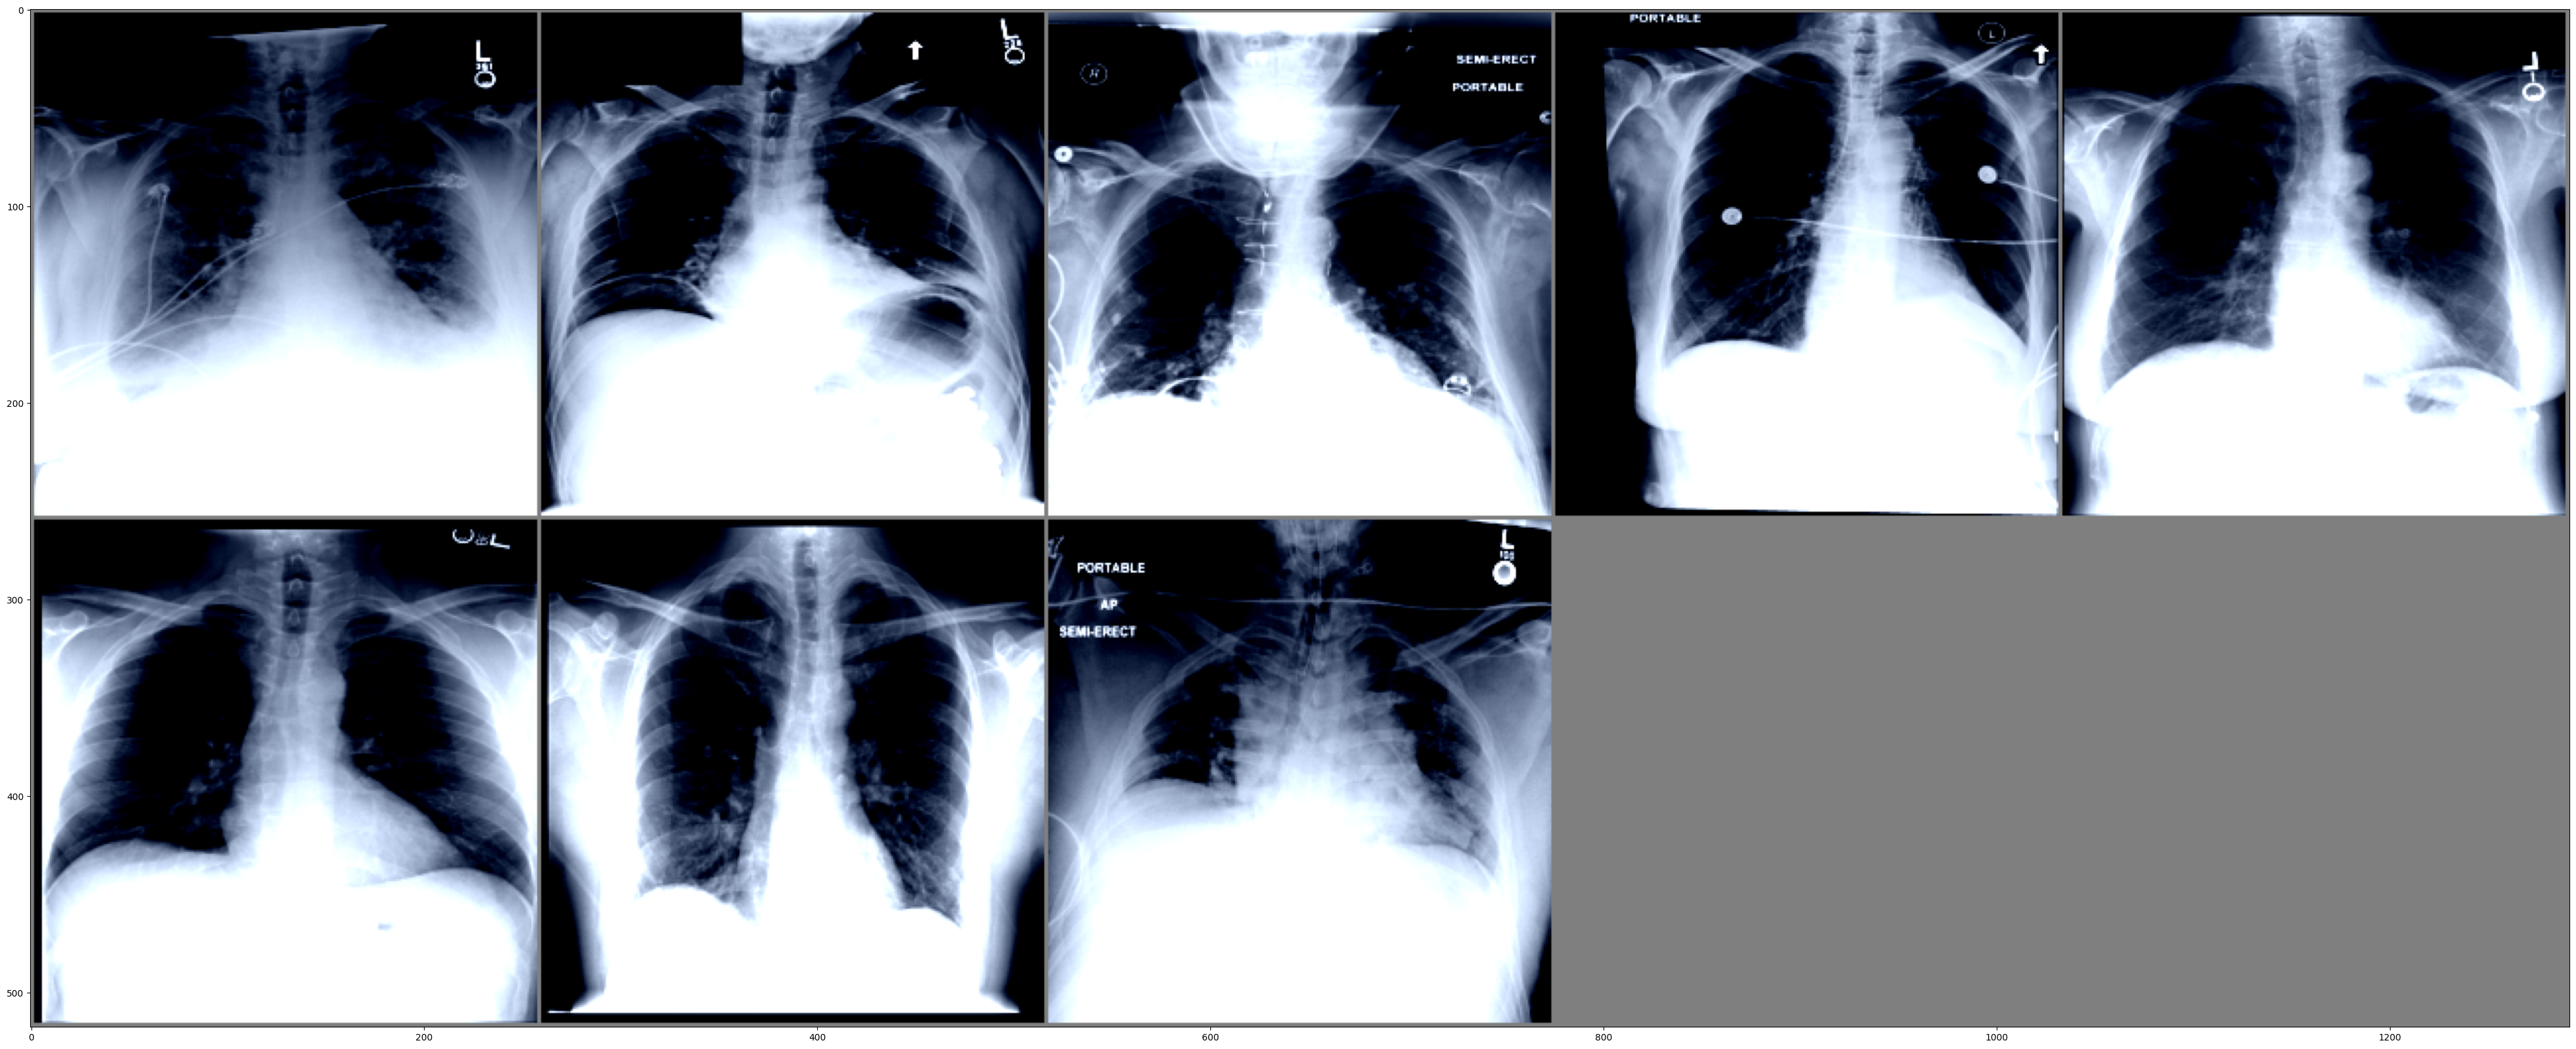

In [17]:
# Function to show a batch of images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize if you used normalization like mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Set a larger figure size
plt.figure(figsize=(50, 50))  # You can adjust these dimensions as needed

# Adjust the number of images per row in the grid
# 'images' is a batch of your images
grid_img = torchvision.utils.make_grid(images, nrow=5)  # Adjust 'nrow' based on your preference

imshow(grid_img)

# Show the plot
plt.show()
